In [9]:
%matplotlib inline

In [10]:
import requests
from config import weather_api_key

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f864030b7219f496644943da56939fa4


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
from citipy import citipy

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | yirol
City not found. Skipping...
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | sibu
Processing Record 8 of Set 1 | teguise
Processing Record 9 of Set 1 | hauterive
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | tete
Processing Record 15 of Set 1 | mariental
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | tilichiki
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | mackay
Processing Record 20 of Set 1 | easley
Processing Record 21 of Set 1 | meadow lake
Processing Record 22 of Set 1 | ancud
Processing Record 23 of Set 1 | b

Processing Record 37 of Set 4 | bokspits
City not found. Skipping...
Processing Record 38 of Set 4 | kodiak
Processing Record 39 of Set 4 | vilhena
Processing Record 40 of Set 4 | san vicente
Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | mogadishu
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | beringovskiy
Processing Record 46 of Set 4 | port hardy
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | marienburg
Processing Record 49 of Set 4 | jadu
Processing Record 50 of Set 4 | lavrentiya
Processing Record 1 of Set 5 | beloha
Processing Record 2 of Set 5 | evensk
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | landazuri
Processing Record 7 of Set 5 | ilebo
Processing Record 8 of Set 5 | khatanga
Processing Record 9 of Set 5 | tucurui
Processing Record 10 of Set 5

Processing Record 22 of Set 8 | buala
Processing Record 23 of Set 8 | galle
Processing Record 24 of Set 8 | natal
Processing Record 25 of Set 8 | mitu
Processing Record 26 of Set 8 | sibolga
Processing Record 27 of Set 8 | haines junction
Processing Record 28 of Set 8 | melo
Processing Record 29 of Set 8 | lasa
Processing Record 30 of Set 8 | gravelbourg
Processing Record 31 of Set 8 | sao jose da coroa grande
Processing Record 32 of Set 8 | great falls
Processing Record 33 of Set 8 | stabat
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | wittmund
Processing Record 36 of Set 8 | north bend
Processing Record 37 of Set 8 | shizunai
Processing Record 38 of Set 8 | lekoni
Processing Record 39 of Set 8 | husavik
Processing Record 40 of Set 8 | dhidhdhoo
Processing Record 41 of Set 8 | lolua
City not found. Skipping...
Processing Record 42 of Set 8 | waipawa
Processing Record 43 of Set 8 | mirnyy
Processing Record 44 of Set 8 | araouane
Processing Record 45 of Set 8

Processing Record 13 of Set 12 | cherdyn
Processing Record 14 of Set 12 | tezu
Processing Record 15 of Set 12 | vardo
Processing Record 16 of Set 12 | visavadar
Processing Record 17 of Set 12 | buraydah
Processing Record 18 of Set 12 | khonuu
City not found. Skipping...
Processing Record 19 of Set 12 | smolenka
Processing Record 20 of Set 12 | te anau
Processing Record 21 of Set 12 | tual
Processing Record 22 of Set 12 | panzhihua
Processing Record 23 of Set 12 | silvi
Processing Record 24 of Set 12 | cabedelo
Processing Record 25 of Set 12 | morant bay
Processing Record 26 of Set 12 | mayo
Processing Record 27 of Set 12 | puksoozero
Processing Record 28 of Set 12 | kulhudhuffushi
Processing Record 29 of Set 12 | sfantu gheorghe
Processing Record 30 of Set 12 | ugoofaaru
Processing Record 31 of Set 12 | khomeynishahr
City not found. Skipping...
Processing Record 32 of Set 12 | wuzhou
Processing Record 33 of Set 12 | the hammocks
Processing Record 34 of Set 12 | resistencia
Processing R

In [19]:
len(city_data)

551

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,17.11,88,100,2.39,RU,2021-04-24 17:38:48
1,Yellowknife,62.4560,-114.3525,16.00,57,40,12.66,CA,2021-04-24 17:34:52
2,Upernavik,72.7868,-56.1549,34.59,86,29,3.83,GL,2021-04-24 17:38:48
3,Coihaique,-45.5752,-72.0662,53.60,76,90,3.44,CL,2021-04-24 17:38:38
4,Ushuaia,-54.8000,-68.3000,55.40,58,40,16.11,AR,2021-04-24 17:38:04


In [21]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2021-04-24 17:38:48,69.7008,170.3133,17.11,88,100,2.39
1,Yellowknife,CA,2021-04-24 17:34:52,62.4560,-114.3525,16.00,57,40,12.66
2,Upernavik,GL,2021-04-24 17:38:48,72.7868,-56.1549,34.59,86,29,3.83
3,Coihaique,CL,2021-04-24 17:38:38,-45.5752,-72.0662,53.60,76,90,3.44
4,Ushuaia,AR,2021-04-24 17:38:04,-54.8000,-68.3000,55.40,58,40,16.11


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/24/21'

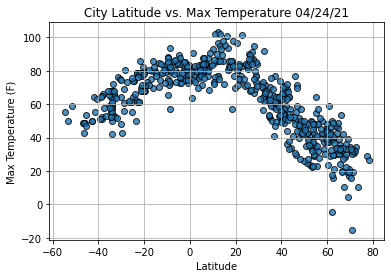

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

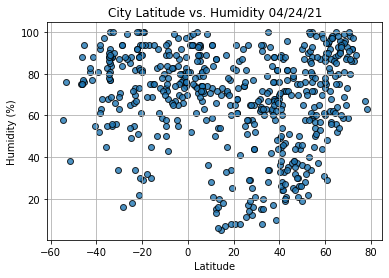

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

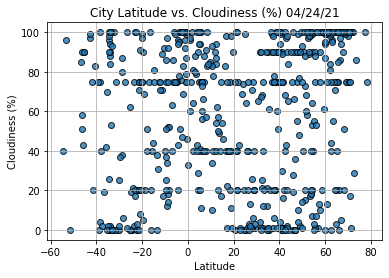

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

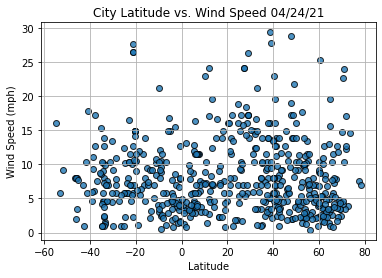

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)

In [37]:
index13 = city_data_df.loc[13]
index13

City                    Mariental
Country                        NA
Date          2021-04-24 17:38:51
Lat                      -24.6333
Lng                       17.9667
Max Temp                    73.87
Humidity                       18
Cloudiness                      0
Wind Speed                  10.16
Name: 13, dtype: object

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2021-04-24 17:38:48,69.7008,170.3133,17.11,88,100,2.39
1,Yellowknife,CA,2021-04-24 17:34:52,62.4560,-114.3525,16.00,57,40,12.66
2,Upernavik,GL,2021-04-24 17:38:48,72.7868,-56.1549,34.59,86,29,3.83
5,Sibu,MY,2021-04-24 17:38:49,2.3000,111.8167,77.00,94,40,3.44
6,Teguise,ES,2021-04-24 17:38:49,29.0605,-13.5640,77.00,44,20,17.27


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
